In [1]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [2]:
def nin_block(in_channels, out_channels, kernel_size, padding, stride):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding),
        nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1), nn.ReLU()
    )

In [3]:
net = nn.Sequential(
    nin_block(1,96,kernel_size=11,stride=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,stride=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,stride=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
)

In [4]:
X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 1.879, train acc 0.284, test acc 0.150
2295.7 examples/sec on cuda:0


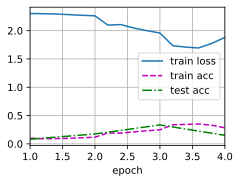

In [6]:
lr, num_epochs, batch_size = 0.1, 4, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [6]:
!nvidia-smi

Wed Apr 30 16:10:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| 44%   38C    P5             20W /  220W |    8376MiB /  12282MiB |     39%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----